In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./data_processing/loan_approval.csv')

In [5]:
df.head()

,Applicant_Income,Coapplicant_Income,Marital_Status,Credit_Score,Loan_Amount,Loan_Term,Property_Area,Education_Level,Gender,Loan_Approved
0,17795.0,1387.0,Married,637.0,16619.0,84.0,Urban,Not Graduate,Female,No
1,2860.0,2679.0,Married,621.0,38687.0,NaN,Semiurban,Graduate,NaN,No
2,7390.0,2106.0,Single,674.0,27943.0,72.0,Urban,NaN,Female,Yes
3,13964.0,8173.0,Married,579.0,27819.0,60.0,Rural,Graduate,Female,No
4,13284.0,4223.0,Single,721.0,12741.0,72.0,NaN,Graduate,Male,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    950 non-null    float64
 1   Coapplicant_Income  950 non-null    float64
 2   Marital_Status      950 non-null    object 
 3   Credit_Score        950 non-null    float64
 4   Loan_Amount         950 non-null    float64
 5   Loan_Term           950 non-null    float64
 6   Property_Area       950 non-null    object 
 7   Education_Level     950 non-null    object 
 8   Gender              950 non-null    object 
 9   Loan_Approved       950 non-null    object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


In [7]:
df.describe()

,Applicant_Income,Coapplicant_Income,Credit_Score,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000
mean,10852.571579,5082.455789,676.033684,20522.825263,48.000000
std,5061.632859,2943.161570,71.346015,11504.142575,24.245322
min,2009.000000,1.000000,550.000000,1015.000000,12.000000
25%,6730.750000,2472.750000,616.250000,9806.250000,24.000000
50%,10548.000000,5205.500000,678.000000,21210.500000,48.000000
75%,15190.000000,7620.750000,737.000000,30263.000000,72.000000
max,19988.000000,9996.000000,799.000000,39995.000000,84.000000


In [8]:
df.describe(include='O')

,Marital_Status,Property_Area,Education_Level,Gender,Loan_Approved
count,950,950,950,950,950
unique,2,3,2,2,2
top,Married,Urban,Graduate,Male,No
freq,593,467,672,571,652


In [9]:
df.isna().sum()

Applicant_Income      50
Coapplicant_Income    50
Marital_Status        50
Credit_Score          50
Loan_Amount           50
Loan_Term             50
Property_Area         50
Education_Level       50
Gender                50
Loan_Approved         50
dtype: int64

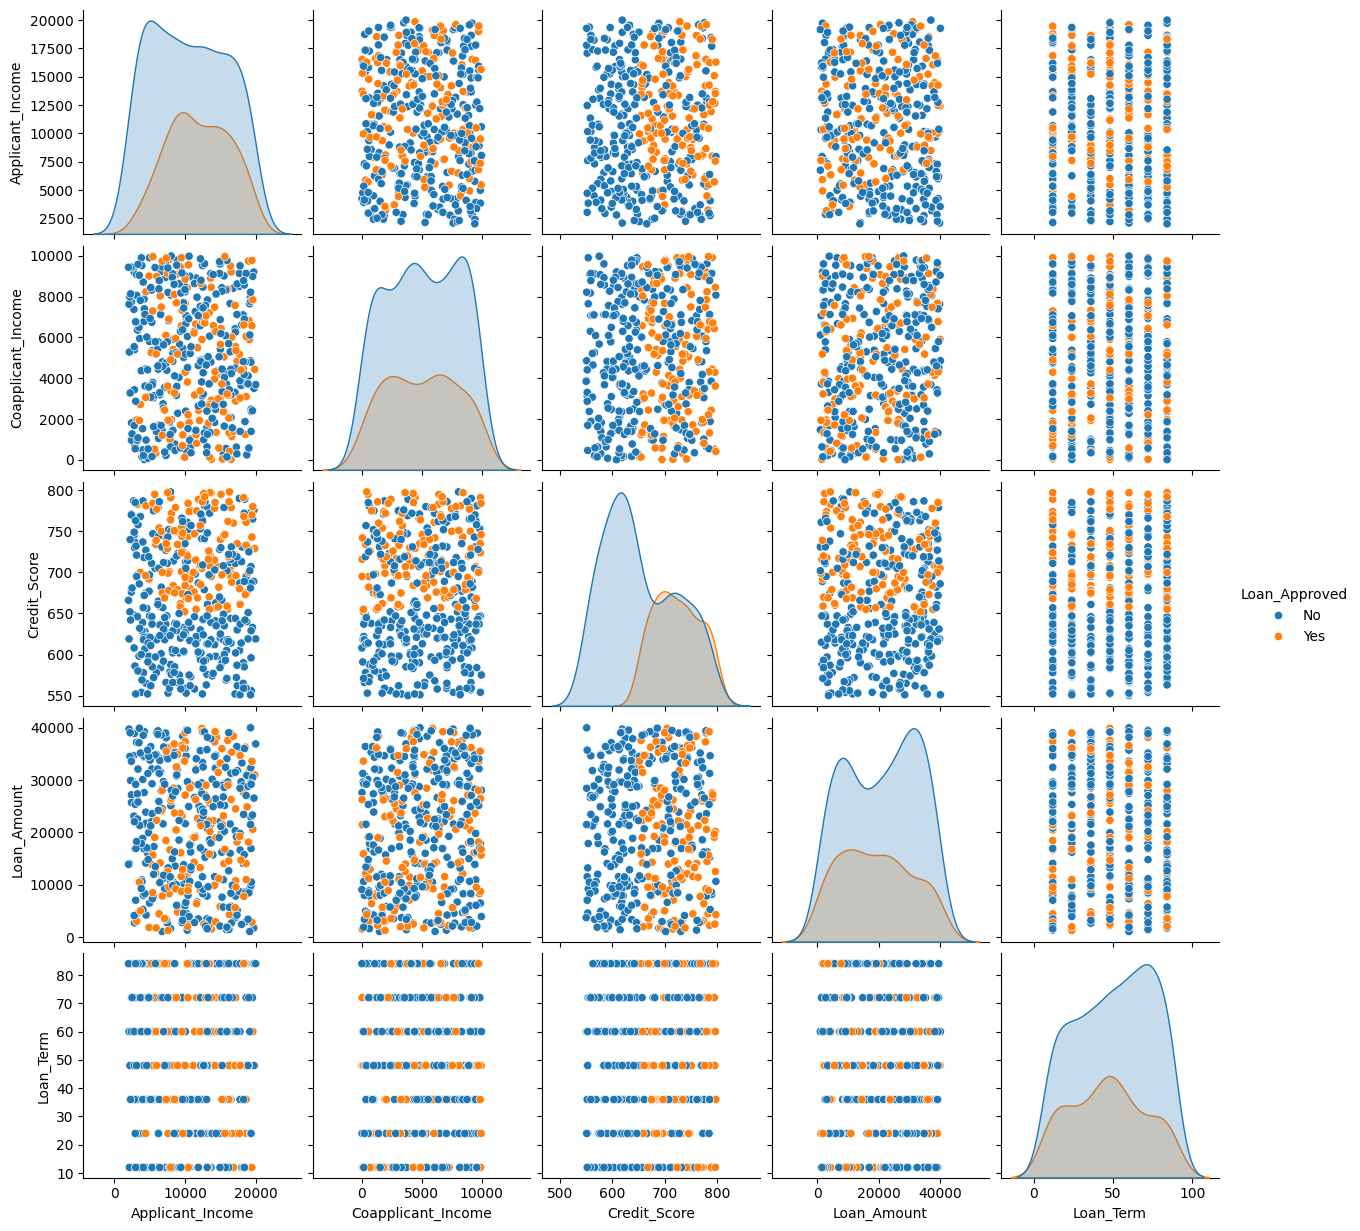

In [12]:
sns.pairplot(data=df.sample(500), hue='Loan_Approved')

## Exploratory Data Analysis

We will perform our EDA before cleaning the dataset, as missing data may tell us something importing. 

### Questions

- What kind of credit score tends to get approved vs denined loans?
- How does education level relate to applicant income and to getting a loan approved?
- Does the marital status have an effect on loan approval?

NOTE: We'll start with 3 questions, then expand as needed

### What kind of credit score tends to get approved vs denined loans?

<Axes: xlabel='Credit_Score', ylabel='Density'>

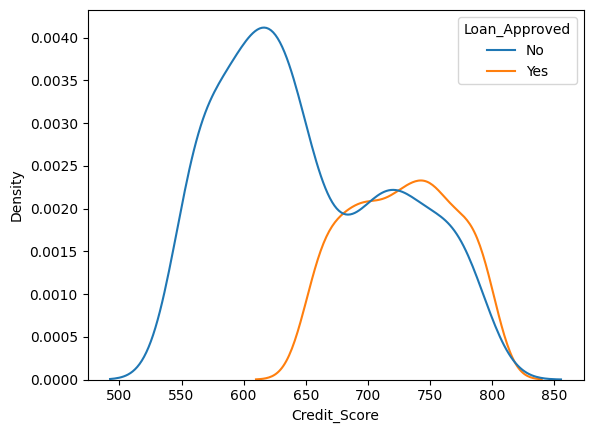

In [42]:
sns.kdeplot(data=df, x='Credit_Score', hue='Loan_Approved')

In [44]:
approved = df['Loan_Approved'] == 'Yes'

In [48]:
df[approved]['Credit_Score'].agg(['mean', 'min', 'max'])

mean    726.893617
min     651.000000
max     799.000000
Name: Credit_Score, dtype: float64

In [49]:
df[~approved]['Credit_Score'].agg(['mean', 'min', 'max'])

mean    654.562874
min     550.000000
max     798.000000
Name: Credit_Score, dtype: float64

>Looking at the KDE plot and the above masking techniques, it seems the minimum score to be approved for a loan is 651. A score that high does not guarantee a loan approval, but it definitely seems to help.
>
>This will also help later with feature engineering by potentially adding a binary column for good credit versus bad credit.

### How does education level relate to applicant income?

<Axes: xlabel='Applicant_Income', ylabel='Education_Level'>

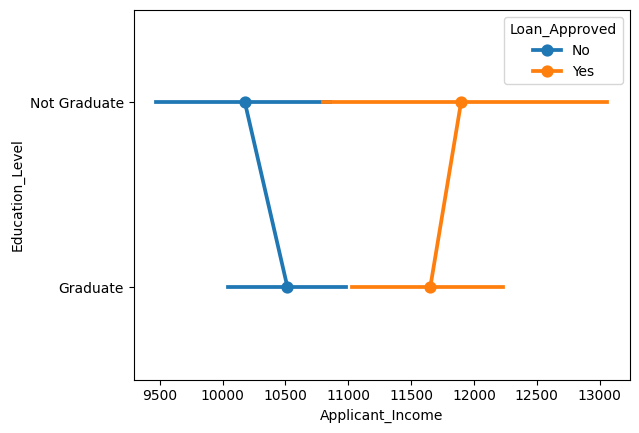

In [58]:
sns.pointplot(data=df, x='Applicant_Income', y='Education_Level', hue='Loan_Approved')


> In the above pointplot, we see something interesting. Applicant's who have Graduated are able to get loan approvals with lower incomes than applicants who did not graduate. This means that applicants who did not graduate have to earn more money on average if they want to be approved for a loan. 

### Does the marital status have an effect on loan approval?

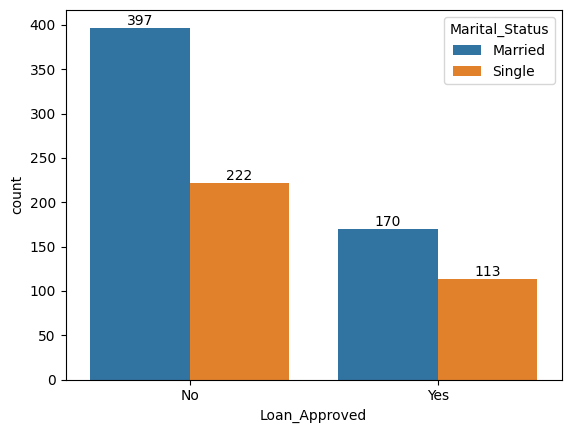

In [65]:
ax = sns.countplot(data=df, x='Loan_Approved', hue='Marital_Status')
for con in ax.containers:
    ax.bar_label(con)

> From the above countplot, we can see that Married couples tend to apply for loans more often than single applicants. However, this does not seem to be a determining factor when it comes to getting approved for a loan. 